<a href="https://colab.research.google.com/github/deutschkihun/Data-Analysis/blob/master/Visualization_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization case study 

## Source file folder 
https://drive.google.com/drive/folders/14OCwtwosdabCbhIMsLtwu4KEcjDWY1Mp?usp=sharing

## 1.Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore") 



In [13]:
diamonds  = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Analysis /Visualization case study/diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 2. Univariate Exploration


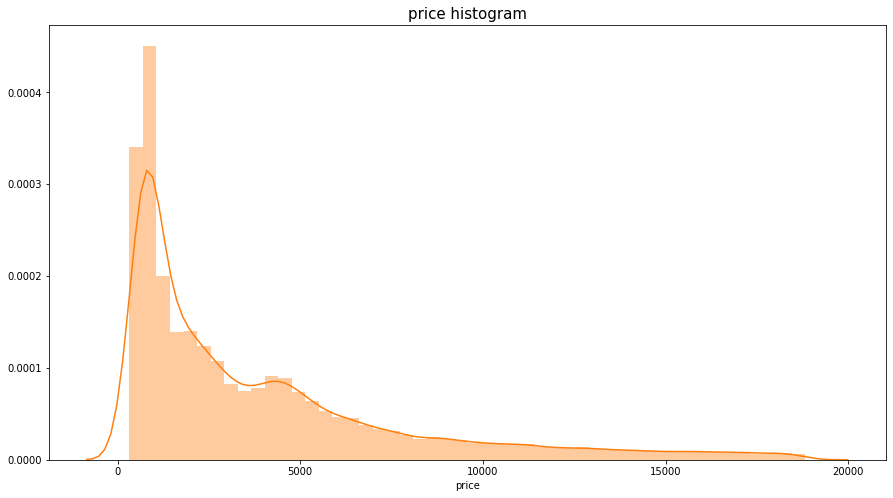

In [47]:
plt.subplots(figsize=(15,8))
base_color = sns.color_palette()[1]
sns.distplot(diamonds['price'],color=base_color)
plt.title('price histogram',fontsize=15);

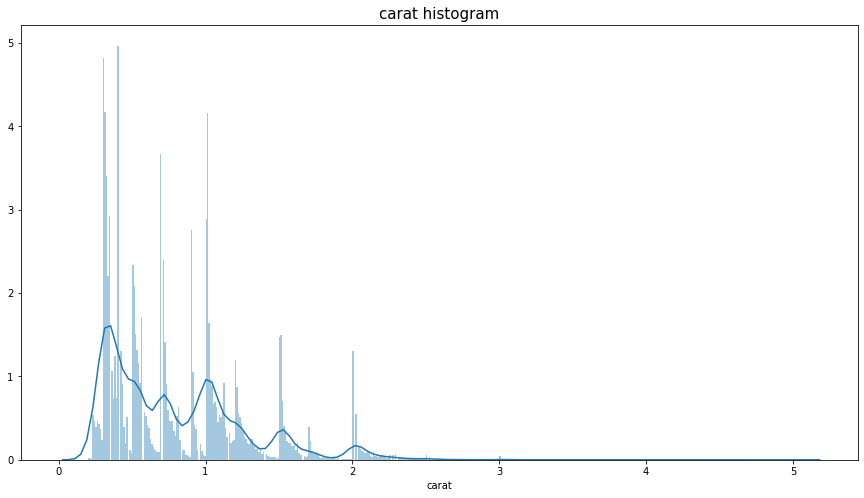

In [48]:
plt.subplots(figsize=(15,8))
bins = np.arange(0,5.01+0.01,0.01)
base_color = sns.color_palette()[0]
sns.distplot(diamonds['carat'],color=base_color,bins=bins);
plt.title('carat histogram',fontsize=15);

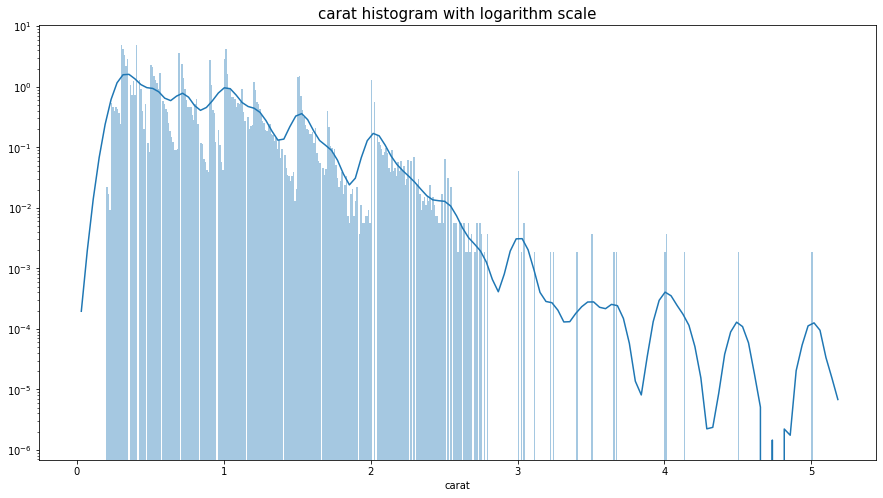

In [49]:
f,ax= plt.subplots(figsize=(15,8))
bins = np.arange(0,5.01+0.01,0.01)
base_color = sns.color_palette()[0]
sns.distplot(diamonds['carat'],color=base_color,bins=bins);
ax.set_yscale('log')
plt.title('carat histogram with logarithm scale',fontsize=15);

Text(0.5, 1.0, 'carat histogram with partiion zoom')

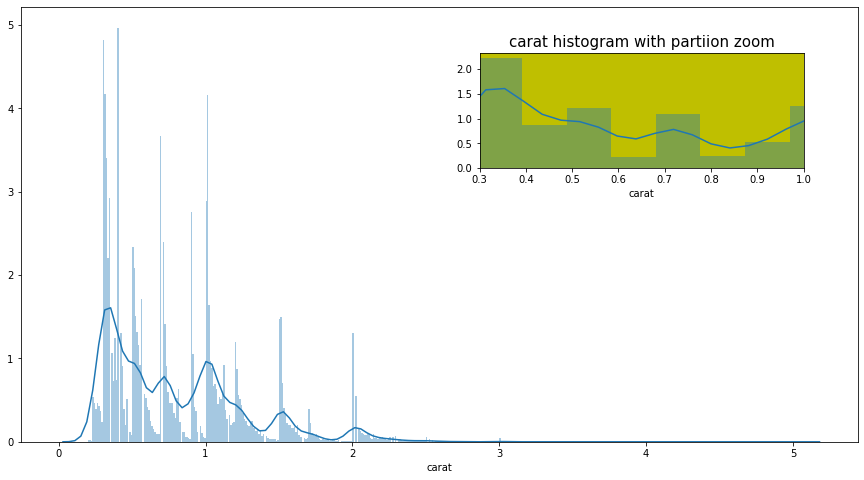

In [50]:
f,ax= plt.subplots(figsize=(15,8))
bins = np.arange(0,5.01+0.01,0.01)
base_color = sns.color_palette()[0]

sns.distplot(diamonds['carat'],color=base_color,bins=bins, ax=ax)
ax2 = plt.axes([0.55, 0.6, .3, .2], facecolor='y')
# this plotting shows the size and position of zoomed picture. 

sns.distplot(diamonds['carat'], ax=ax2)
ax2.set_title('zoom')
ax2.set_xlim([0.3,1.]);
# limitation of zoom in interval 

plt.title('carat histogram with partiion zoom',fontsize=15)

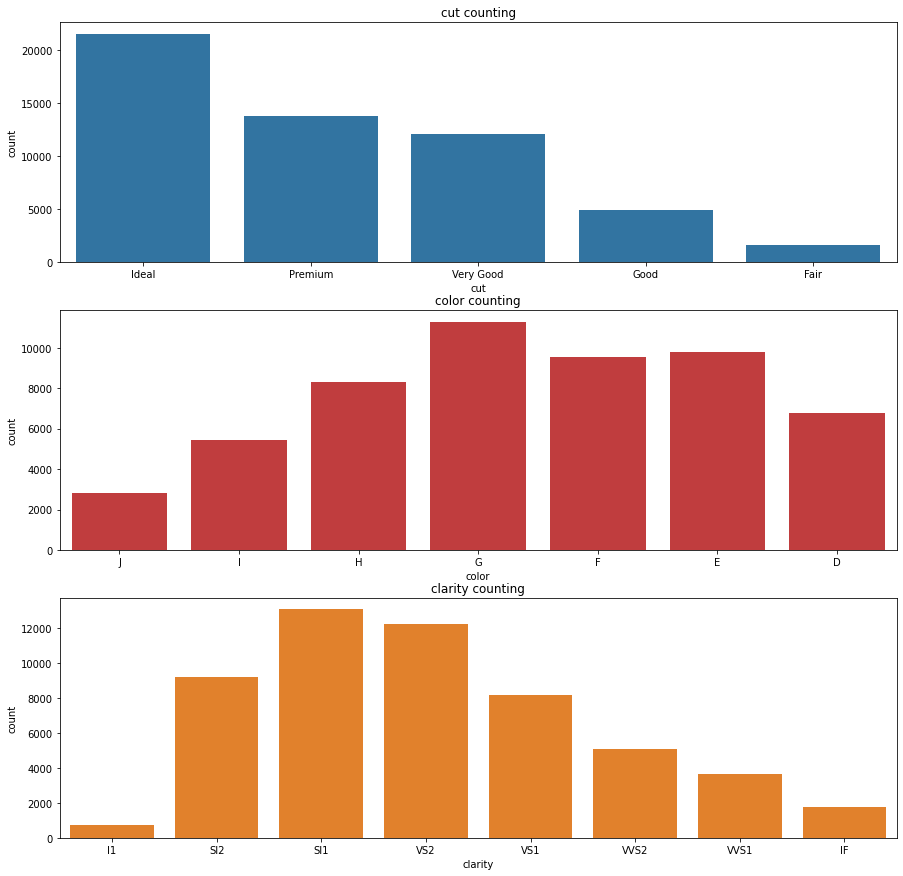

In [51]:
# univariate plots of color
f,ax=plt.subplots(3,1 ,figsize=(15,15))
base_color = sns.color_palette()[0]
sns.countplot(data=diamonds,x='cut',color=base_color,order=diamonds['cut'].value_counts().index,ax=ax[0]);
ax[0].set_title('cut counting')

base_color = sns.color_palette()[3]
sns.countplot(data=diamonds,x='color',color=base_color,ax=ax[1]);
ax[1].set_title('color counting')

base_color = sns.color_palette()[1]
sns.countplot(data=diamonds,x='clarity',color=base_color,ax=ax[2]);
ax[2].set_title("clarity counting");


## 3. Bivariate Exploration


In [40]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

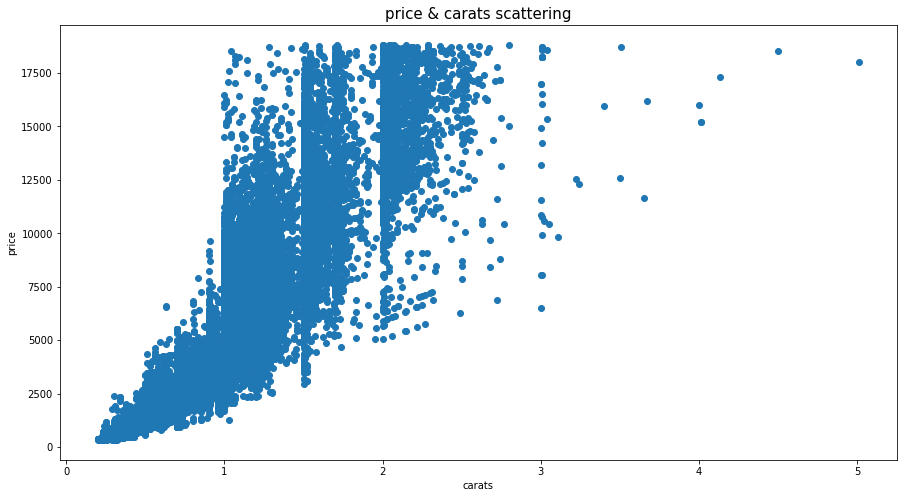

In [43]:
# bivariate plot of price vs. carat
plt.subplots(figsize=(15,8))
plt.scatter(x=diamonds['carat'],y=diamonds['price'])
plt.xlabel('carats')
plt.ylabel('price');

plt.title('price & carats scattering',fontsize=15);

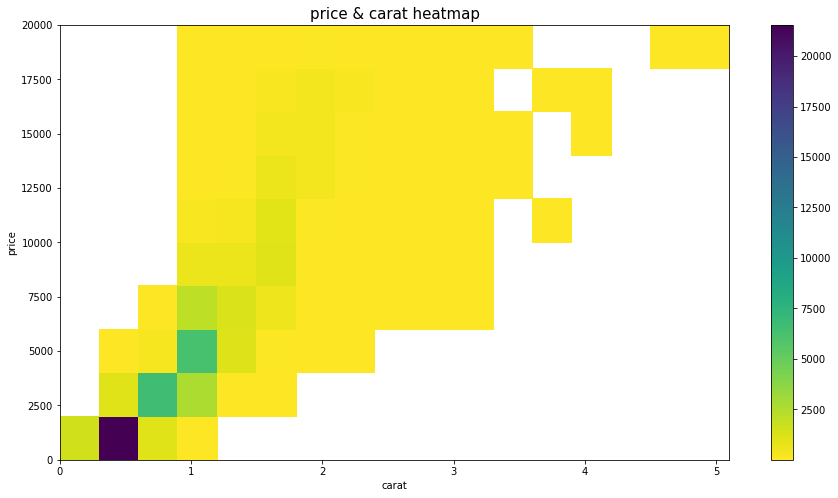

In [46]:
plt.figure(figsize=(15,8))
bin_carat = np.arange(0,5.01+0.3,0.3)
bin_price = np.arange(0,18823+2000,2000)
plt.hist2d(data=diamonds,x='carat',y='price',cmin=0.5,cmap='viridis_r',bins=[bin_carat,bin_price]) ;
plt.colorbar()  
plt.xlabel('carat')
plt.ylabel('price')
plt.title('price & carat heatmap',fontsize=15);

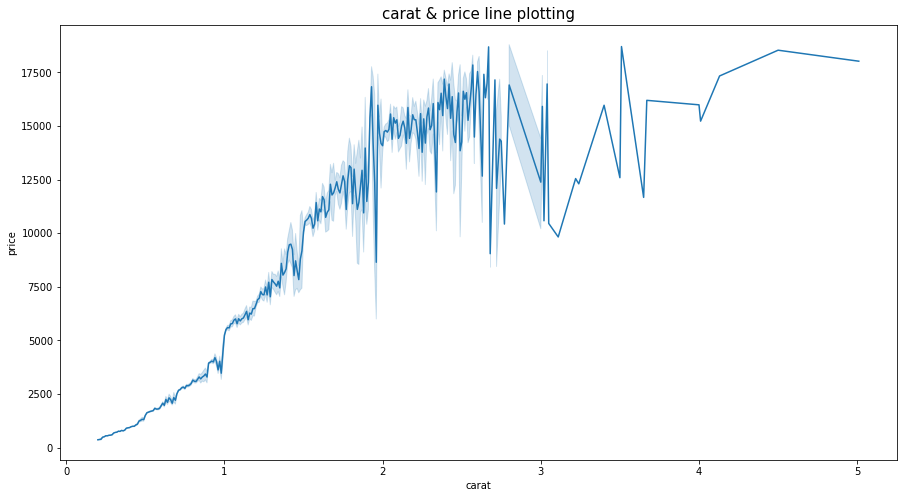

In [52]:
plt.subplots(figsize=(15,8))
sns.lineplot(data=diamonds,x='carat',y='price',ci=90)
plt.xlabel('carat')
plt.ylabel('price')
plt.title('carat & price line plotting',fontsize=15);

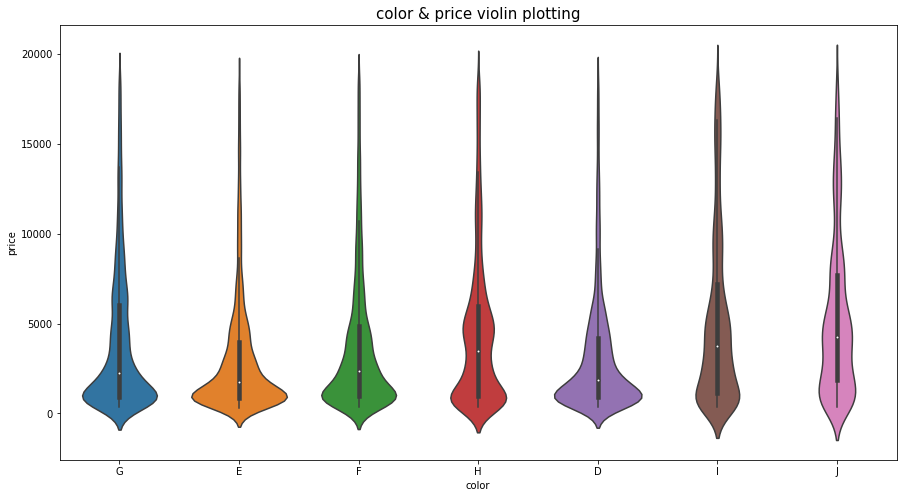

In [54]:
# bivariate plots of price vs color
plt.subplots(figsize=(15,8))
sns.violinplot(data=diamonds,x='color',y='price',order=diamonds['color'].value_counts().index);
plt.title('color & price violin plotting',fontsize=15);

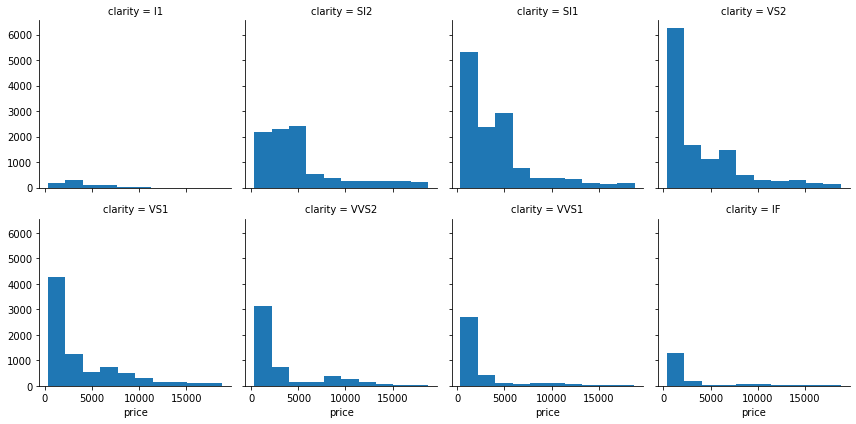

In [55]:
g=sns.FacetGrid(data=diamonds,col='clarity',col_wrap=4)
g.map(plt.hist,'price');

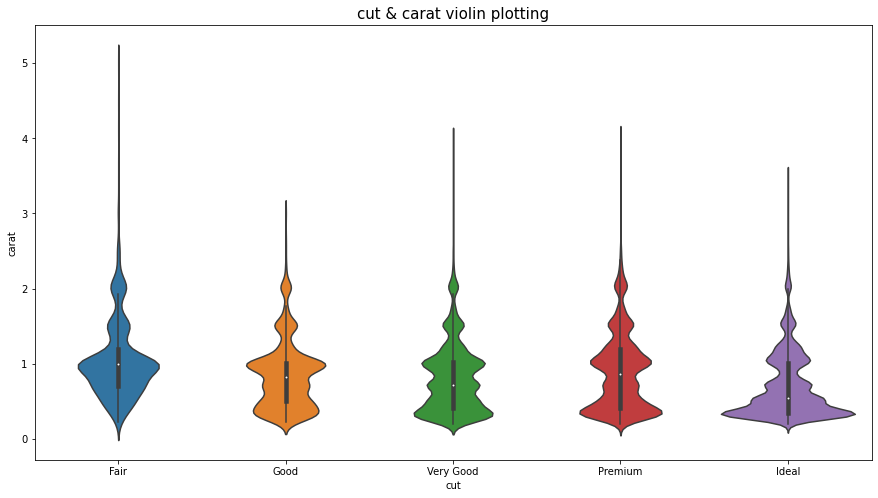

In [56]:
# bivariate plots of carat vs. cut, color, clarity
plt.subplots(figsize=(15,8))
sns.violinplot(data=diamonds,x='cut',y='carat')
plt.title('cut & carat violin plotting',fontsize=15);

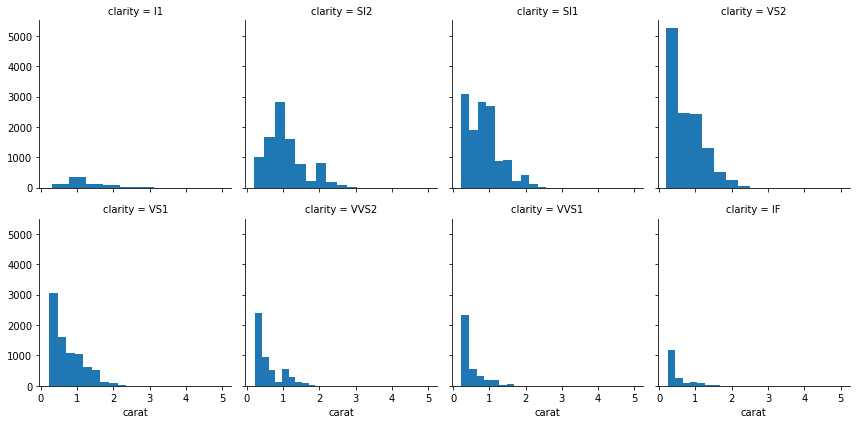

In [57]:
g=sns.FacetGrid(data=diamonds,col='clarity', col_wrap=4)
g.map(plt.hist,'carat');

## 4. Multivariate Exploration


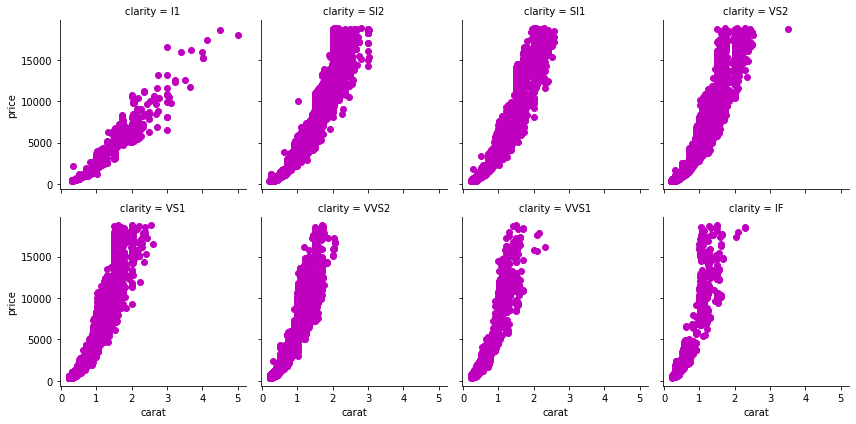

In [58]:
# multivariate plot of price by carat weight, and clarity
#Facetgrid
g = sns.FacetGrid(data=diamonds,col='clarity',col_wrap=4)
g.map(plt.scatter,'carat','price',color='m');

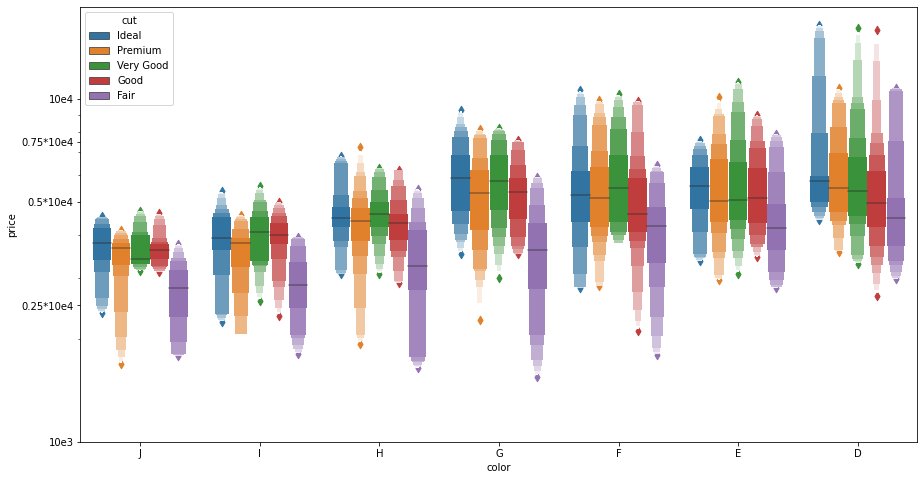

In [60]:
# multivariate plot of price by cut and color, for approx. 1 carat diamonds

small=diamonds.query('carat>=0.95 & carat<=1.00 ')  
# around 1 carat diamonds 

plt.subplots(figsize=(15,8))
ax=sns.boxenplot(data=small,x='color',y='price',hue='cut',scale='linear',hue_order=diamonds.cut.value_counts().index)
plt.yscale('log')
plt.yticks([10**3,0.25*10**4,0.5*10**4,0.75*10**4,10**4], ['10e3','0.25*10e4','0.5*10e4','0.75*10e4','10e4'])
ax.set_yticklabels([], minor = True);

Text(0.5, 1.0, 'color & price & cut point plotting')

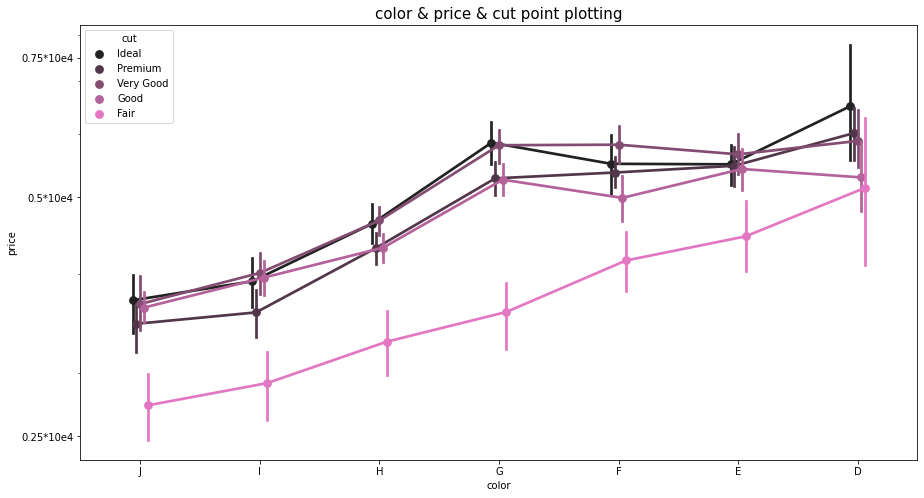

In [64]:
plt.subplots(figsize=(15,8))
base_color = sns.color_palette()[6]
ax=sns.pointplot(data=small,x='color',y='price',hue='cut',dodge=True,
             color=base_color,hue_order=diamonds.cut.value_counts().index)
# dodge: amount to separate the points for each level of the hue variable along the categorical axis.
plt.yscale('log')
plt.yticks([0.25*10**4,0.5*10**4,0.75*10**4], ['0.25*10e4','0.5*10e4','0.75*10e4'])
ax.set_yticklabels([], minor = True);
plt.title('color & price & cut point plotting',fontsize=15)